In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree as tr
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor

In [28]:
def load_csvs_to_dfs(filenames):
    dataframes = []
    for name in filenames:
        file_path = f'../data/{name}.csv'
        try:
            df = pd.read_csv(file_path)
            dataframes.append(df)
            print(f'Loaded {file_path} into DataFrame: {name}')
        except FileNotFoundError:
            print(f'File {file_path} not found.')
    return dataframes

csvs = [
        'cesd_total', 
        'gad_total',
        'inq_perceivedburden',
        'inq_thwartedbelong',
        'upps_total']
dataframes = load_csvs_to_dfs(csvs)

Loaded ../data/cesd_total.csv into DataFrame: cesd_total
Loaded ../data/gad_total.csv into DataFrame: gad_total
Loaded ../data/inq_perceivedburden.csv into DataFrame: inq_perceivedburden
Loaded ../data/inq_thwartedbelong.csv into DataFrame: inq_thwartedbelong
Loaded ../data/upps_total.csv into DataFrame: upps_total


In [35]:
def loop_through_dfs(list_of_dfs):
    for idx, df in enumerate(list_of_dfs):
        plot_outcome(df)
        plot_correlations(df)

In [ ]:
for idx, df in enumerate(dataframes):
    # Using locals() to get the name of the variable referencing the DataFrame
    df_name = [name for name, obj in locals().items() if obj is df][0]
    print("DataFrame at index", idx, "is named", df_name)

In [34]:
def plot_outcome(df: pd.DataFrame):
    # Extract the last column
    last_column_name = df.columns[-1]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.hist(df[last_column_name], bins=50)
    plt.title(f'Histogram of {last_column_name}')
    plt.ylabel(last_column_name)
    plt.grid(True)

    plt.savefig(f'../plots/hist_{last_column_name}.png')

In [ ]:
def plot_correlations(df: pd.DataFrame):
    last_column_name = df.columns[-1]
    sns.clustermap(df.corr(), cmap='viridis')
    plt.savefig(f'../plots/corr_{last_column_name}.png')

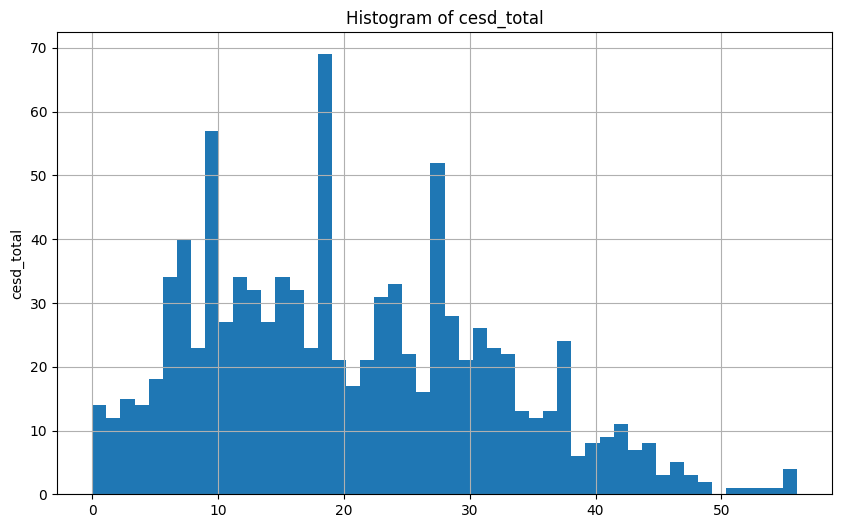

<Figure size 640x480 with 0 Axes>

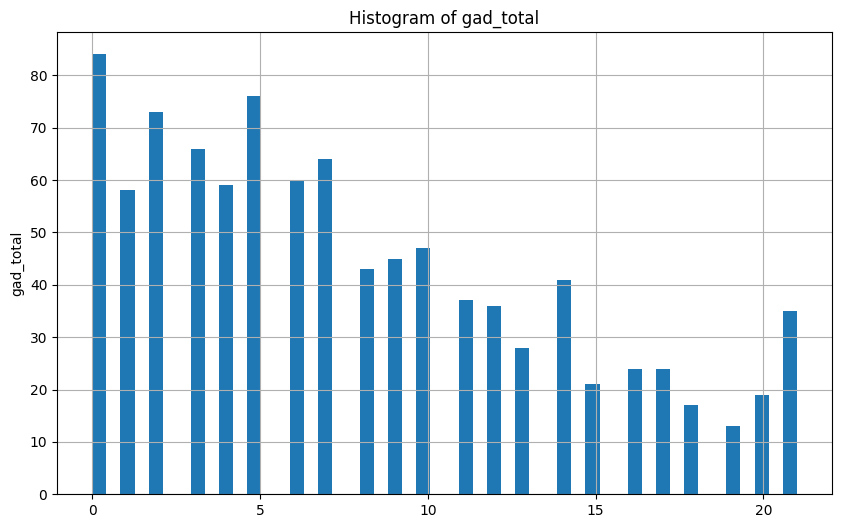

<Figure size 640x480 with 0 Axes>

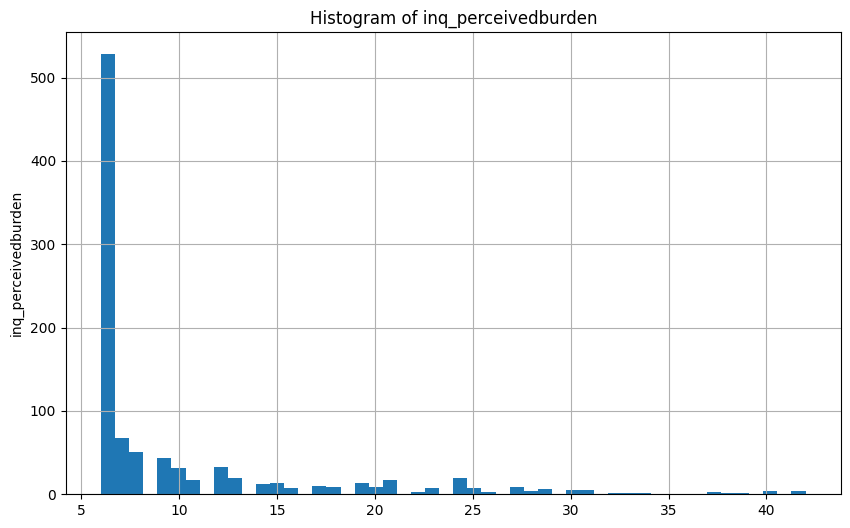

<Figure size 640x480 with 0 Axes>

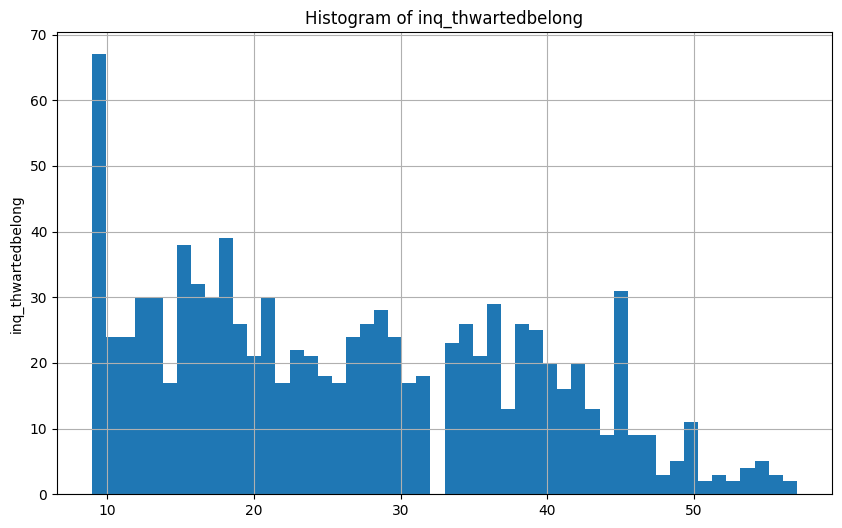

<Figure size 640x480 with 0 Axes>

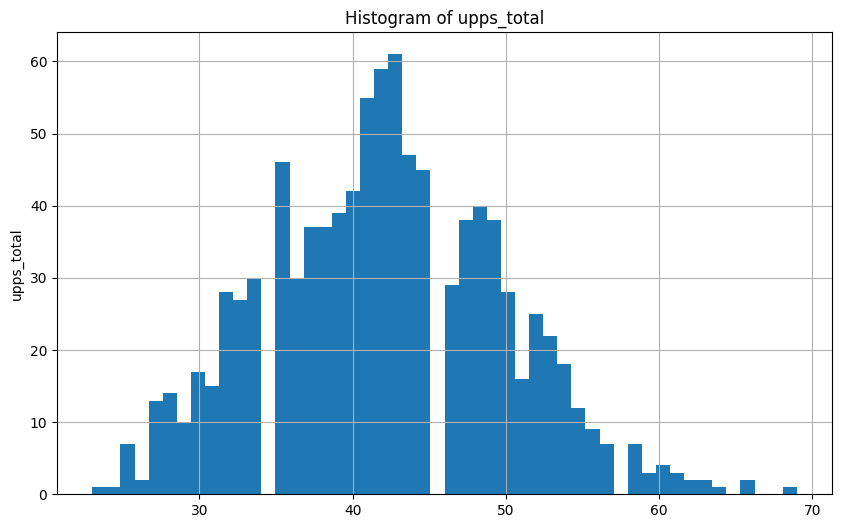

<Figure size 640x480 with 0 Axes>

In [36]:
loop_through_dfs(dataframes)